# Set up

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CliffWalking-v0')

# Value Iteration Agent

In [10]:
class ValueIteration:
  def __init__(self,gamma=1,theta=0.0001):
    self.gamma = gamma
    #theta is an approximation error threshold
    self.theta = theta

  def best_action(self, V, state):
    action_value_list = []
    for action in range(len(env.P[state])):
      prob, next_state, r, _ = env.P[state][action][0] #as the next state is deterministic for a state-action pair
      action_value = r + self.gamma * V[next_state]
      action_value_list.append(action_value)
    best_action = np.argmax(action_value_list)
    return best_action

  def new_V(self, V, state):
    best_action = self.best_action(V, state)
    prob, next_state, r, _ = env.P[state][best_action][0]
    new_state_value = r + self.gamma * V[next_state]
    return new_state_value
  
  def learning(self, max_iterations=100, max_steps=50):
    #INITIATE RANDOM POLICY
    V = np.random.rand(env.observation_space.n)
    V[-1] = 0 
    optimal_rewards = np.zeros(max_iterations)

    for i in range(max_iterations):
      #initial V_new and V_diff at the start of each iteration
      V_new = []
      V_diff = []

      #sweep through all states in each iteration
      for state in range(env.nS):
        new_state_value = self.new_V(V, state) #UPDATE V USING RANDOM POLICY AND EXPECTED VALUE
        value_diff = np.abs(new_state_value - V[state])
        V_new.append(new_state_value)
        V_diff.append(value_diff)
      

      #DECIDE TO CHANGE POLICY OR NOT, OR BREAK
      #decide to continue to next iteration or not
      if np.max(V_diff[:-1]) > self.theta: #Why V_diff last entry always is 1?
        V = V_new
        V[-1] = 0
        #play one game with the latest V once
        t_optimal = 0
        state1 = env.reset() 
        done = False
        optimal_reward = 0
        while t_optimal < max_steps and not done:
          action1 = self.best_action(V, state1)
          state2, reward, done, info = env.step(action1)
          state1= state2
          t_optimal += 1
          optimal_reward += reward
        optimal_rewards[i] += optimal_reward

      else:
        r = i-1
        optimal_rewards[i:] = optimal_rewards[r]
        break
        
    #return V at the end of the iteration
    return V, optimal_rewards
  
  #ADD GETTING BEST POLICY METHOD HERE

# Policy Iteration Agent

In [ ]:
class ValueIteration:
  def __init__(self,gamma=1,theta=0.0001):
    self.gamma = gamma
    #theta is an approximation error threshold
    self.theta = theta

  def best_action(self, V, state):
    action_value_list = []
    for action in range(len(env.P[state])):
      prob, next_state, r, _ = env.P[state][action][0] #as the next state is deterministic for a state-action pair
      action_value = r + self.gamma * V[next_state]
      action_value_list.append(action_value)
    best_action = np.argmax(action_value_list)
    return best_action

  def new_V(self, V, state):
    best_action = self.best_action(V, state)
    prob, next_state, r, _ = env.P[state][best_action][0]
    new_state_value = r + self.gamma * V[next_state]
    return new_state_value
  
  def learning(self, max_iterations=100, max_steps=50):
    V = np.random.rand(env.observation_space.n)
    V[-1] = 0 
    optimal_rewards = np.zeros(max_iterations)

    for i in range(max_iterations):
      #initial V_new and V_diff at the start of each iteration
      V_new = []
      V_diff = []

      #sweep through all states in each iteration
      for state in range(env.nS):
        new_state_value = self.new_V(V, state)
        value_diff = np.abs(new_state_value - V[state])
        V_new.append(new_state_value)
        V_diff.append(value_diff)
      
      #decide to continue to next iteration or not
      if np.max(V_diff[:-1]) > self.theta: #Why V_diff last entry always is 1?
        V = V_new
        V[-1] = 0
        #play one game with the latest V once
        t_optimal = 0
        state1 = env.reset() 
        done = False
        optimal_reward = 0
        while t_optimal < max_steps and not done:
          action1 = self.best_action(V, state1)
          state2, reward, done, info = env.step(action1)
          state1= state2
          t_optimal += 1
          optimal_reward += reward
        optimal_rewards[i] += optimal_reward

      else:
        r = i-1
        optimal_rewards[i:] = optimal_rewards[r]
        break
        
    #return V at the end of the iteration
    return V, optimal_rewards
  

# Training

In [12]:
v1 = ValueIteration()
V, optimal_rewards = v1.learning(max_iterations=1000)


# Getting best policy

In [7]:
best_action_list = []
for state in range(env.nS):
  action_value_list = []
  for action in range(len(env.P[state])):
    prob, next_state, r, _ = env.P[state][action][0] 
    action_value = r + 1 * V[next_state]
    action_value_list.append(action_value)
    best_action = np.argmax(action_value_list)
  best_action_list.append(best_action)
    

In [8]:
import pandas as pd
actions = ["^", ">", "v", "<"]
policy_arrows = [actions[i] for i in best_action_list]
pd.DataFrame(np.array(policy_arrows).reshape(4,12))

,0,1,2,3,4,5,6,7,8,9,10,11
0,>,>,>,>,>,>,>,>,>,>,>,v
1,>,>,>,>,>,>,>,>,>,>,>,v
2,>,>,>,>,>,>,>,>,>,>,>,v
3,^,^,^,^,^,^,^,^,^,^,>,>


# Comparison between Policy Iteration and Value Iteration

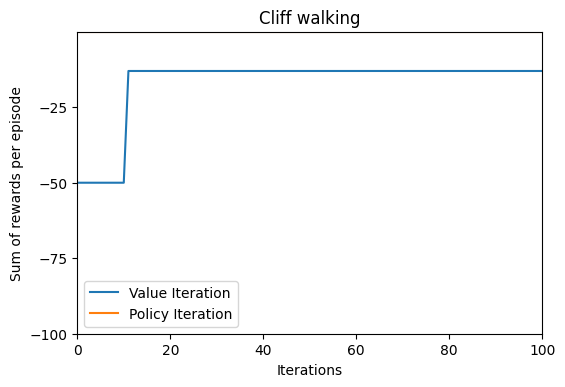

In [19]:
import seaborn as sns

optimal_rewards_p = np.zeros(1000)

fig = plt.figure(dpi=100)
ax = plt.axes()
p_v_matrix = np.array([optimal_rewards, optimal_rewards_p]).transpose()
df = pd.DataFrame(p_v_matrix, columns = ["Value Iteration", "Policy Iteration"])

ax = sns.lineplot(data=df, x = df.index, y = "Value Iteration")
ax = sns.lineplot(data=df, x = df.index, y = "Policy Iteration")
ax.set(title="Cliff walking", xlabel="Iterations", ylabel = "Sum of rewards per episode", yticks = range(-100, 0, 25))
ax.set_ylim(-100,0)
ax.set_xlim(0,100)
ax.legend(["Value Iteration", "Policy Iteration"])